# Clara

Clara uses the same as k-medoid. However, it draws multiple samples of the whole data are chosen randomly as the representation of the data. Then k-mediods algorithm is done by selecting medoids of each sample and return the best clustering as the output. A major disadvantage is that the result is highly dependent on the sample size chosen.

#### Reference: 
The notebook is following the process in Kaggle but is much simpler and uses sklearn_extra.
1. https://www.kaggle.com/saptarsi/kmedoid-sg/notebook
2. https://github.com/scikit-learn-contrib/scikit-learn-extra/archive/master.zip 

In [51]:
pip install scikit-learn-extra

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 1.9 MB 2.3 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [65]:
# This Python 3 environment comes with many helpful analytics libraries installed
# !pip install scikit-learn-extra

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import random
from sklearn.preprocessing import StandardScaler
from sklearn_extra.cluster import KMedoids

from sklearn import metrics


In [201]:
df = pd.read_csv('players_20.csv')
col_list = np.r_[4:5, 6:8, 10:14, 16:19, 22:23, 31:43, 45:78]
df_numeric = df.iloc[:, col_list]
df_numeric = df_numeric.fillna(0)
df = df_numeric
# df.drop(['Unnamed: 0'], inplace=True, axis=1)
# df.drop(['goalkeeping_diving'], inplace=True, axis=1)
# df.drop(['goalkeeping_handling'], inplace=True, axis=1)
# df.drop(['goalkeeping_kicking'], inplace=True, axis=1)
df.drop(['league_name', 'body_type'], inplace=True, axis=1)
df.drop(['player_positions','preferred_foot'], inplace=True, axis=1)
df.drop(['nation_position'], inplace=True, axis=1)
df.drop(['player_traits'], inplace=True, axis=1) #'work_rate','body_type', 'real_face', 'player_tags', 'team_position',

df.shape



(18483, 50)

In [67]:
print(df.columns)

Index(['age', 'height_cm', 'weight_kg', 'league_rank', 'overall', 'potential',
       'international_reputation', 'nation_jersey_number', 'pace', 'shooting',
       'passing', 'dribbling', 'defending', 'physic', 'gk_diving',
       'gk_handling', 'gk_kicking', 'gk_reflexes', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength',
       'power_long_shots', 'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking', 'defending_standing_tackle',
       'defending_sliding_tackle', 'goalkee

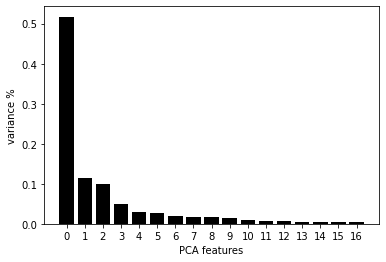

In [68]:
from sklearn.decomposition import PCA
# Standardize the data to have a mean of ~0 and a variance of 1
X_std = StandardScaler().fit_transform(df)

# Create a PCA instance: pca
pca = PCA(n_components=0.95)
principalComponents = pca.fit_transform(X_std)
# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
# Save components to a DataFrame
PCA_components = pd.DataFrame(principalComponents)

In [42]:
dtaf = pd.read_csv('players_20.csv')

col_list = np.r_[4:5, 6:8, 10:14, 16:19, 22:23, 31:43, 45:78]
dtaf = dtaf.iloc[:, col_list]
dtaf.isna().sum() 

age                               0
height_cm                         0
weight_kg                         0
league_name                     240
league_rank                     240
overall                           0
potential                         0
player_positions                  0
preferred_foot                    0
international_reputation          0
body_type                         0
nation_position               17356
nation_jersey_number          17356
pace                           2061
shooting                       2061
passing                        2061
dribbling                      2061
defending                      2061
physic                         2061
gk_diving                     16422
gk_handling                   16422
gk_kicking                    16422
gk_reflexes                   16422
player_traits                 10936
attacking_crossing                0
attacking_finishing               0
attacking_heading_accuracy        0
attacking_short_passing     

In [202]:
df_o = df[df['shooting']==0]
# print('DFO:', df_o)
scaler = StandardScaler()

# transform data
scaled = scaler.fit_transform(df_o)
# print(scaled)

# df_gk = df[df['gk_speed']!=0]
shape = df_o.shape[0]
# print(shape)


In [83]:
type(scaled)

numpy.ndarray

In [203]:
size = len(df)
# k=3

min_avg_cost = np.inf
min_avg_sil = np.inf

best_sw=[]
best_cost=[]

k_vals = [i for i in range(8)]

for k in range(2, 10, 1):
    print('K: ', k)
    runs=5
    for r in range(runs):
        print('run: ', r)

        sampling_idx = random.sample([i for i in range(1000)], (40+k*2))
#         type(sampling_idx)
#         print(sampling_idx)
        sample = []

        # idx = sampling_idx[0]
        # print(idx)
        # print(df.iloc[idx])
        for idx in sampling_idx:
            sample.append(df.iloc[idx])

        sampled_df = pd.DataFrame(sample)
        sampled_df.shape
        kMedoids = KMedoids(n_clusters = k, random_state = 1338)
        kMedoids.fit(sampled_df)
        y_kmed = kMedoids.fit_predict(sampled_df)
#         print(y_kmed)
        tmp_cost_sample = kMedoids.inertia_
        tmp_center = kMedoids.cluster_centers_
        tem_center_index = kMedoids.medoid_indices_

        from sklearn.metrics import silhouette_samples, silhouette_score
        tmp_silhouette_avg = silhouette_score(sampled_df, y_kmed)
#         print(tmp_cost_sample, tmp_silhouette_avg)

        if tmp_cost_sample < min_avg_cost: # and tmp_silhouette_avg <= min_avg_sil:
            min_avg_cost = tmp_cost_sample
            min_avg_sil = tmp_silhouette_avg
            print("new cost: ", min_avg_cost)
            print("new silhouette: ", min_avg_sil)
            new_center = tmp_center

    print('best cluster cost: ', min_avg_cost)
    print('best silhoutte value: ', min_avg_sil )
    # print('best center: ', new_center)
    best_sw.append(min_avg_sil)
    best_cost.append(min_avg_cost)
print('best_sw', best_sw, "\n", 'best_cost:', best_cost)

K:  2
run:  0
new cost:  4123.273068057416
new silhouette:  0.18469963847966833
run:  1
new cost:  4045.193584095015
new silhouette:  0.19925014106356542
run:  2
run:  3
run:  4
new cost:  3691.9086913858855
new silhouette:  0.3940695900064847
best cluster cost:  3691.9086913858855
best silhoutte value:  0.3940695900064847
K:  3
run:  0
run:  1
new cost:  2906.6563605966576
new silhouette:  0.39391312102044707
run:  2
run:  3
run:  4
best cluster cost:  2906.6563605966576
best silhoutte value:  0.39391312102044707
K:  4
run:  0
run:  1
run:  2
run:  3
run:  4
new cost:  2396.111008601232
new silhouette:  0.4189756293291221
best cluster cost:  2396.111008601232
best silhoutte value:  0.4189756293291221
K:  5
run:  0
run:  1
run:  2
run:  3
run:  4
best cluster cost:  2396.111008601232
best silhoutte value:  0.4189756293291221
K:  6
run:  0
run:  1
run:  2
run:  3
run:  4
best cluster cost:  2396.111008601232
best silhoutte value:  0.4189756293291221
K:  7
run:  0
run:  1
run:  2
run:  3

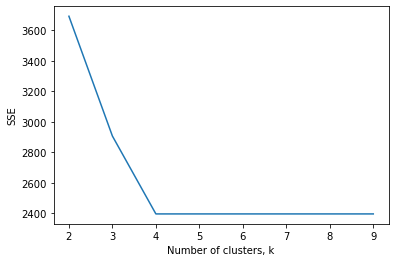

In [204]:
plt.plot(range(2, 10), best_cost)
# plt.title('Cost')
plt.xlabel('Number of clusters, k')
plt.ylabel('SSE')      #within cluster sum of squares
plt.show()

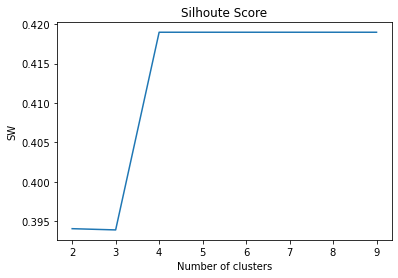

In [205]:
plt.plot(range(2, 10), best_sw)
plt.title('Silhoute Score')
plt.xlabel('Number of clusters')
plt.ylabel('SW')      #within cluster sum of squares
plt.show()

Now we try Clara on breast cancer data set.

In [171]:
from sklearn import datasets
bc_dataset =  datasets.load_breast_cancer()
bc_dataset
df2 = pd.DataFrame(bc_dataset.data, columns=bc_dataset.feature_names)
df2['target'] = pd.Series(bc_dataset.target)
df2

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [194]:
size = len(df2)
k=3

min_avg_cost = np.inf
min_avg_sil = np.inf

best_sw=[]
best_cost=[]

k_vals = [i for i in range(8)]

# for k in range(2, 10, 1):
#     print('K: ', k)

runs=1
for r in range(runs):
    print('run: ', r)

    sampling_idx = random.sample([i for i in range(569)], (40+k*2))
#         type(sampling_idx)
#         print(sampling_idx)
    sample = []

    # idx = sampling_idx[0]
    # print(idx)
    # print(df.iloc[idx])
    for idx in sampling_idx:
        sample.append(df2.iloc[idx])

    sampled_df2 = pd.DataFrame(sample)
    sampled_df2.shape
    kMedoids = KMedoids(n_clusters = k, random_state = 1338)
    kMedoids.fit(sampled_df2)
    y_kmed = kMedoids.fit_predict(sampled_df2)
    print(y_kmed)
    tmp_cost_sample = kMedoids.inertia_
    tmp_center = kMedoids.cluster_centers_
    tem_center_index = kMedoids.medoid_indices_

    from sklearn.metrics import silhouette_samples, silhouette_score
    tmp_silhouette_avg = silhouette_score(sampled_df2, y_kmed)
#         print(tmp_cost_sample, tmp_silhouette_avg)

    if tmp_cost_sample < min_avg_cost: # and tmp_silhouette_avg <= min_avg_sil:
        min_avg_cost = tmp_cost_sample
        min_avg_sil = tmp_silhouette_avg
        print("new cost: ", min_avg_cost)
        print("new silhouette: ", min_avg_sil)
        new_center = tmp_center

    print('best cluster cost: ', min_avg_cost)
    print('best silhoutte value: ', min_avg_sil )
    # print('best center: ', new_center)
    best_sw.append(min_avg_sil)
    best_cost.append(min_avg_cost)
print('best_sw', best_sw, "\n", 'best_cost:', best_cost)

run:  0
[1 1 0 0 0 1 1 1 0 2 1 0 0 1 2 0 0 0 1 1 2 2 2 0 1 1 1 2 0 0 2 2 1 0 0 2 0
 1 2 1 0 1 0 1 0 0]
new cost:  9581.45656021015
new silhouette:  0.36112399439669896
best cluster cost:  9581.45656021015
best silhoutte value:  0.36112399439669896
best_sw [0.36112399439669896] 
 best_cost: [9581.45656021015]


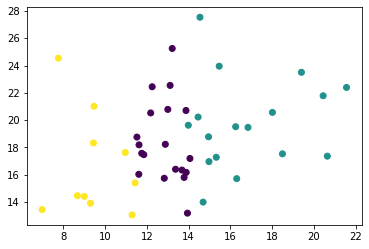

In [195]:
plt.scatter(sampled_df2.iloc[:,0], sampled_df2.iloc[:,1], c=y_kmed);

Checking the best k


In [197]:
size = len(df2)
# k=3

min_avg_cost = np.inf
min_avg_sil = np.inf

best_sw=[]
best_cost=[]

k_vals = [i for i in range(8)]

for k in range(2, 10, 1):
    print('K: ', k)

    runs=4
    for r in range(runs):
        print('run: ', r)

        sampling_idx = random.sample([i for i in range(569)], (40+k*2))
    #         type(sampling_idx)
    #         print(sampling_idx)
        sample = []

        # idx = sampling_idx[0]
        # print(idx)
        # print(df.iloc[idx])
        for idx in sampling_idx:
            sample.append(df2.iloc[idx])

        sampled_df3 = pd.DataFrame(sample)
        sampled_df3.shape
        kMedoids = KMedoids(n_clusters = k, random_state = 1338)
        kMedoids.fit(sampled_df3)
        y_kmed = kMedoids.fit_predict(sampled_df3)
        print(y_kmed)
        tmp_cost_sample = kMedoids.inertia_
        tmp_center = kMedoids.cluster_centers_
        tem_center_index = kMedoids.medoid_indices_

        from sklearn.metrics import silhouette_samples, silhouette_score
        tmp_silhouette_avg = silhouette_score(sampled_df3, y_kmed)
    #         print(tmp_cost_sample, tmp_silhouette_avg)

        if tmp_cost_sample < min_avg_cost: # and tmp_silhouette_avg <= min_avg_sil:
            min_avg_cost = tmp_cost_sample
            min_avg_sil = tmp_silhouette_avg
            print("new cost: ", min_avg_cost)
            print("new silhouette: ", min_avg_sil)
            new_center = tmp_center

    print('best cluster cost: ', min_avg_cost)
    print('best silhoutte value: ', min_avg_sil )
    # print('best center: ', new_center)
    best_sw.append(min_avg_sil)
    best_cost.append(min_avg_cost)
print('best_sw', best_sw, "\n", 'best_cost:', best_cost)

K:  2
run:  0
[1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 0 0 0 1 1 0 1 1 1 1 1
 1 1 0 1 1 1 1]
new cost:  11188.74931126472
new silhouette:  0.7427504805757885
run:  1
[0 0 1 0 1 0 1 1 0 1 1 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 1 0 0 1 1 1 0 1 0 1 0
 1 0 0 1 1 1 0]
run:  2
[0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 1 1 0
 0 1 0 0 1 0 0]
new cost:  10033.444509144592
new silhouette:  0.674173111880398
run:  3
[1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 1 1 1
 1 1 0 1 1 0 1]
new cost:  9000.457300866057
new silhouette:  0.7350015653911683
best cluster cost:  9000.457300866057
best silhoutte value:  0.7350015653911683
K:  3
run:  0
[0 1 1 2 0 0 0 1 2 0 0 1 2 1 0 0 2 2 0 0 1 1 1 1 0 0 1 1 0 2 2 0 2 1 0 2 2
 1 0 0 0 2 1 0 0 1]
new cost:  8354.635580477083
new silhouette:  0.5525771649261345
run:  1
[1 1 1 1 1 2 1 1 0 2 2 1 2 0 0 0 1 0 0 0 2 0 1 1 2 0 1 1 2 2 2 1 0 1 0 1 2
 0 0 1 1 0 0 1 0 2]
run:  2
[0 0 2 1 1 2 2 1 2 1 1 0 2 1 2 1 2 0 2

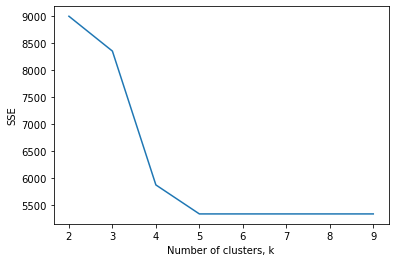

In [198]:
plt.plot(range(2, 10), best_cost)
# plt.title('Cost')
plt.xlabel('Number of clusters, k')
plt.ylabel('SSE')      #within cluster sum of squares
plt.show()

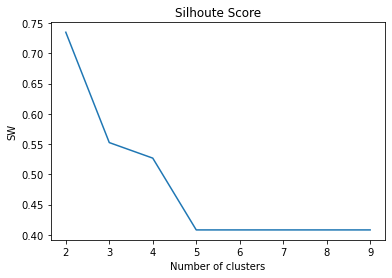

In [199]:
plt.plot(range(2, 10), best_sw)
plt.title('Silhoute Score')
plt.xlabel('Number of clusters')
plt.ylabel('SW')      #within cluster sum of squares
plt.show()

Scratch from here